<a href="https://colab.research.google.com/github/JuanDMV/CUFICO-2018-2/blob/master/TTreeExcercise_JuanDiego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.1).
g++ is already the newest version (4:7.3.0-3ubuntu2.1).
gcc is already the newest version (4:7.3.0-3ubuntu2.1).
gfortran is already the newest version (4:7.3.0-3ubuntu2.1).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.1).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Team Drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb    TrimmedTree.root
BasicPyROOTExample.ipynb  root_build_google_yikes.tar  TTreeExcercise.ipynb


In [0]:
!tar -xf /content/drive/Team\ Drives/PyROOT_in_Google/root_build_google_yikes.tar

In [5]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20 23:35 root_build
drwxr-xr-x  1 root root 4.0K Feb 19 17:17 sample_data
drwx------  4 root root 4.0K Feb 27 02:52 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [7]:
import ROOT
from ROOT import gROOT 

Welcome to JupyROOT 6.14/04


In [0]:
from array import array

In [0]:
MyTree = ROOT.TTree( 'tree1', 'tree para datos x-y-z' )

In [0]:
x = array( 'f', [ 0 ] )
y = array( 'f', [ 0 ] )
z = array( 'i', [ 0 ] )

In [11]:
MyTree.Branch( 'x', x, 'x/F' )
MyTree.Branch( 'y', y, 'y/F' )
MyTree.Branch( 'z', z, 'z/I' )

<ROOT.TBranch object ("z") at 0x8508780>

In [0]:
from random import randint
from numpy.random import normal
from numpy import fabs

In [0]:
for i in range(100000):
  x[0] = normal(5,2,1)
  y[0] = normal(5,2,1)
  z[0] = randint(0,10)
  MyTree.Fill()

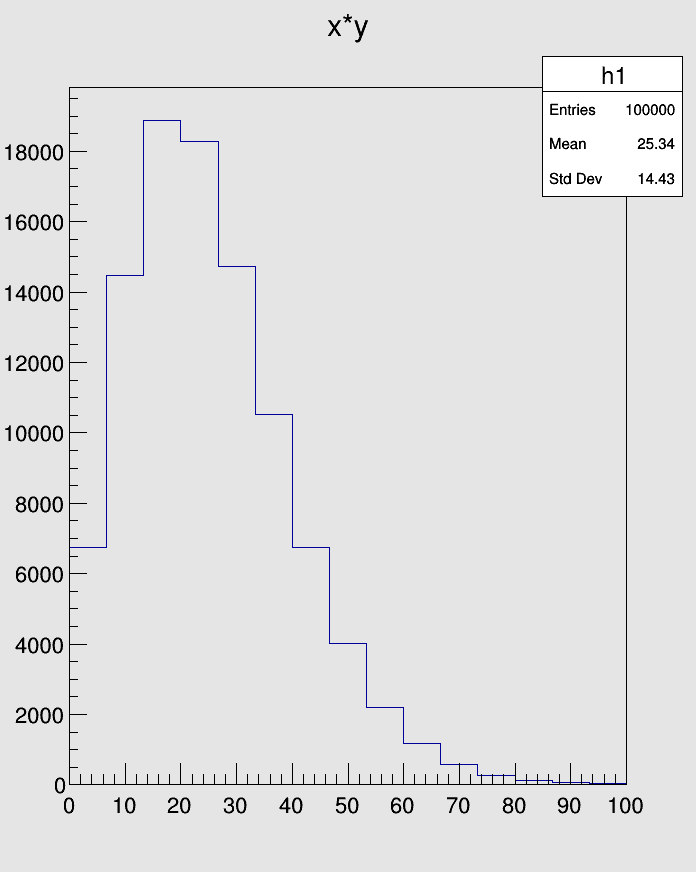

In [14]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
MyTree.Draw("x*y>>h1(15,0,100)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

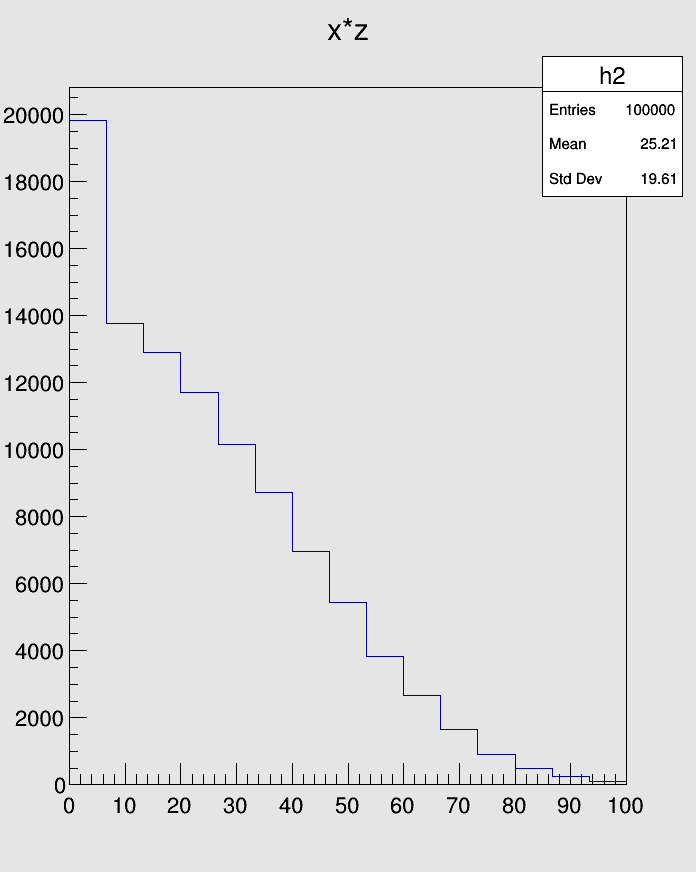

In [15]:
MyTree.Draw("x*z>>h2(15,0,100)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

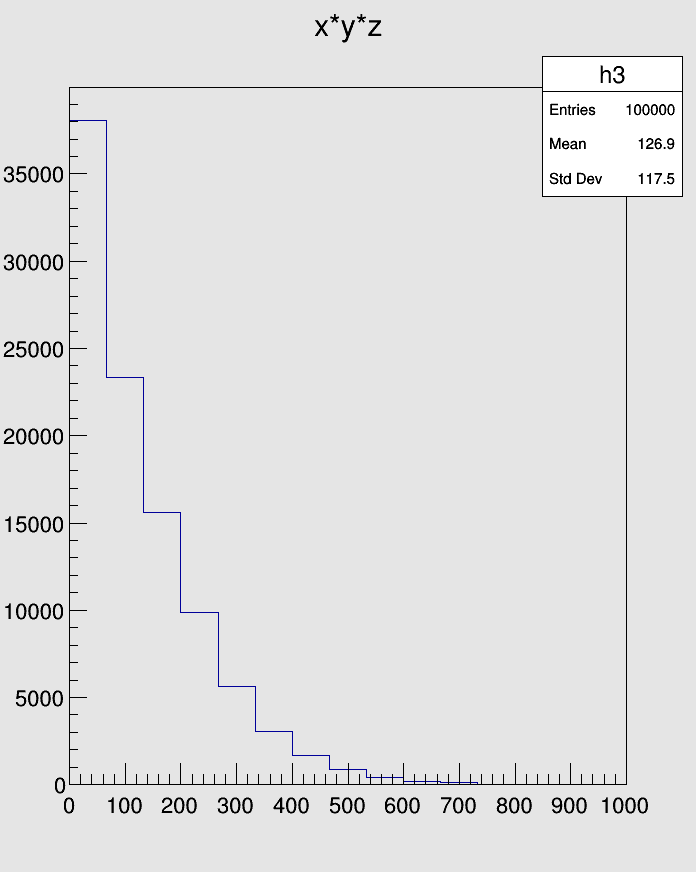

In [16]:
MyTree.Draw("x*y*z>>h3(15,0,1000)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

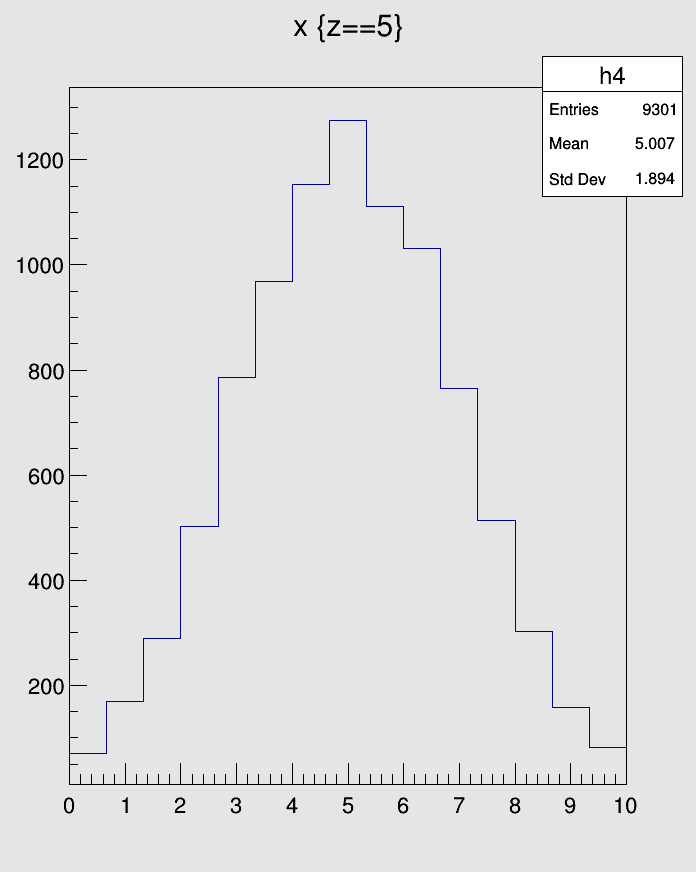

In [17]:
MyTree.Draw("x>>h4(15,0,10)","z==5")
c1.Update()
gROOT.GetListOfCanvases().Draw()

Dado de y es un arreglo de floats, entonces podría no haber un valor de y == 5, por lo tanto es escoge un intervalo para hacer el gráfico. Este intervalo está dado por (5 - 1e-3,  5+1e-3)

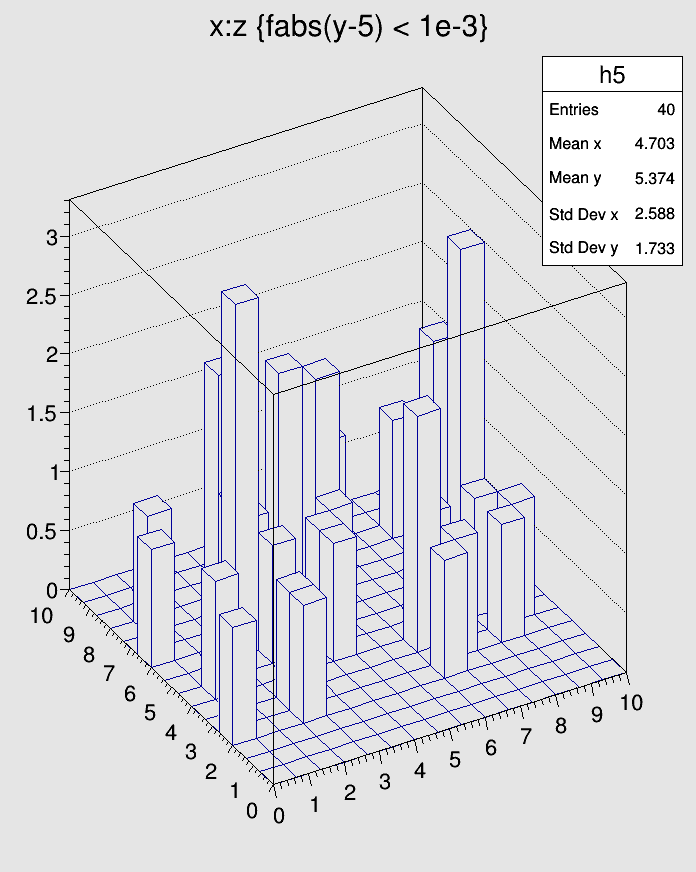

In [18]:
MyTree.Draw("x:z>>h5(15,0,10,15,0,10)", "fabs(y-5) < 1e-3","lego")
c1.Update()
gROOT.GetListOfCanvases().Draw()

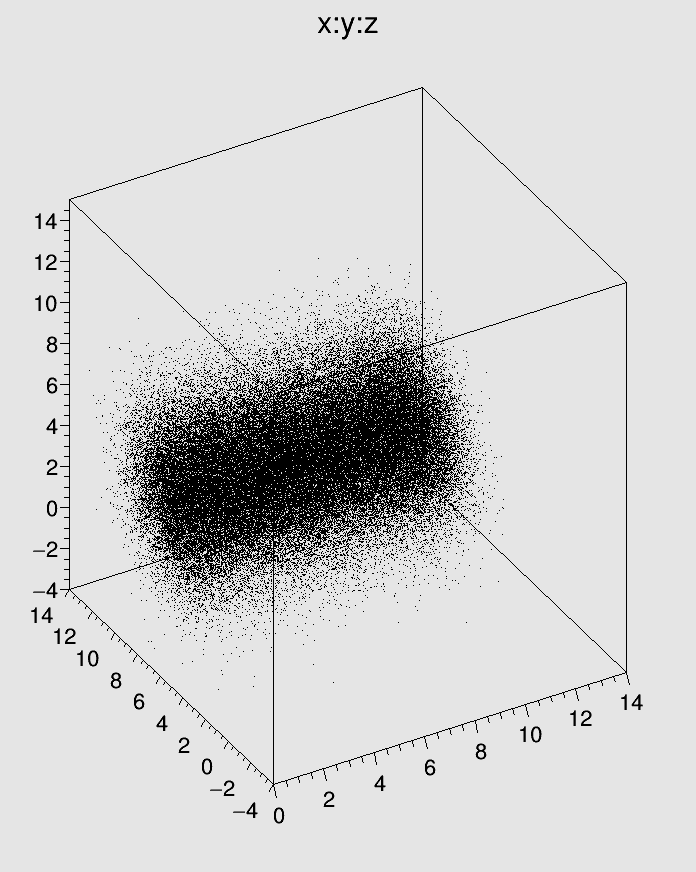

In [19]:
MyTree.Draw("x:y:z>>h6(15,0,10,15,0,10)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

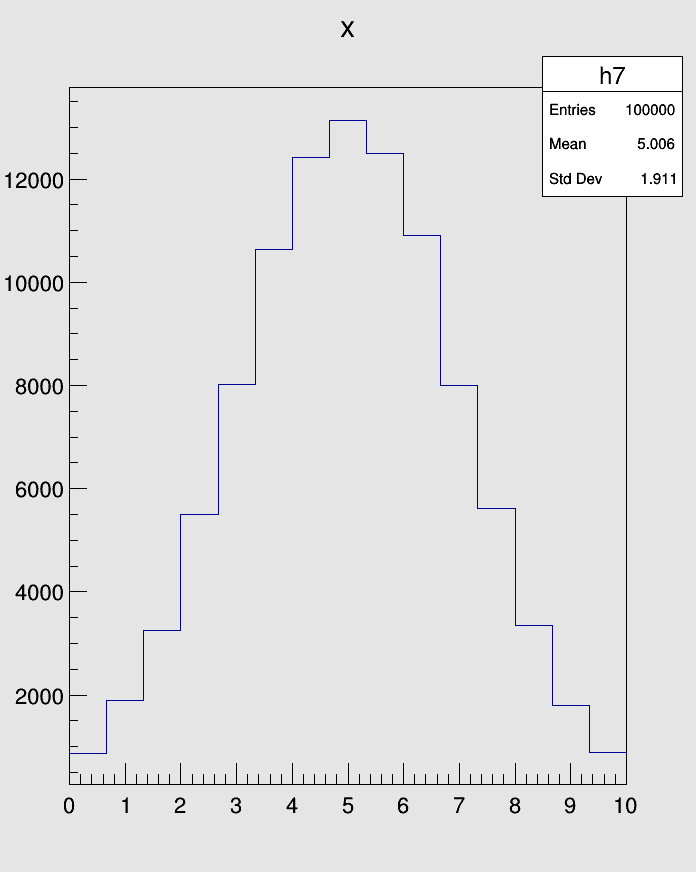

In [20]:
MyTree.Draw("x>>h7(15,0,10)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

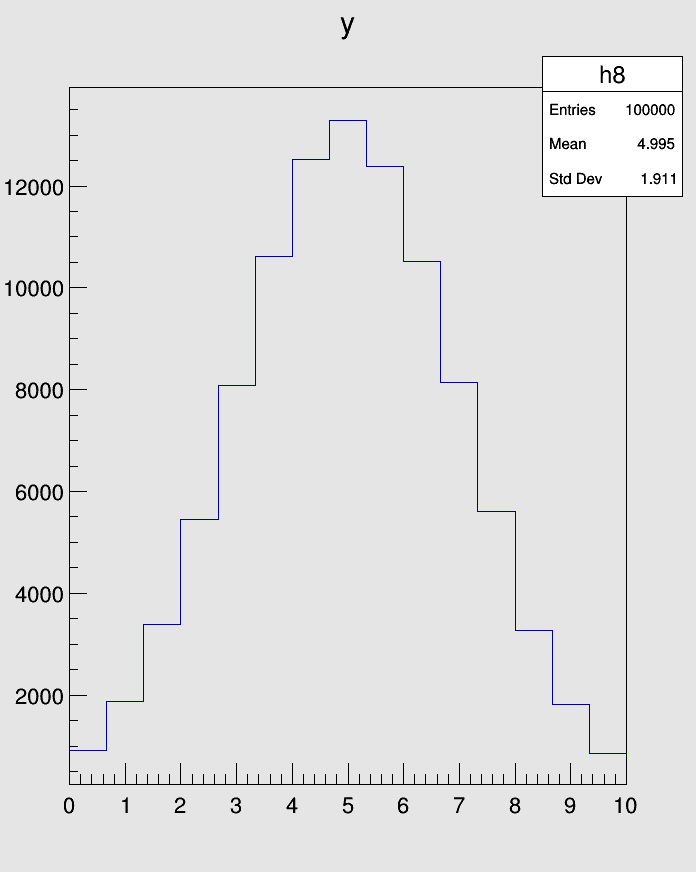

In [21]:
MyTree.Draw("y>>h8(15,0,10)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

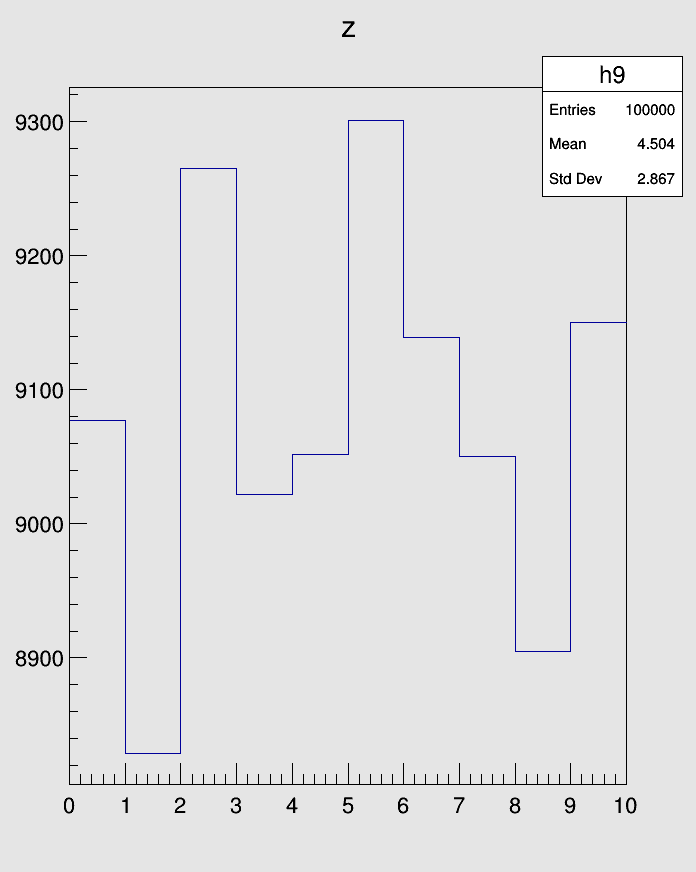

In [22]:
MyTree.Draw("z>>h9(10,0,10)")
c1.Update()
gROOT.GetListOfCanvases().Draw()